# 22.46 Procesamiento Adaptativo de Señales Aleatorias
# Proyecto 02
## Cancelación Activa de Ruido
Este trabajo desarrolla la síntesis de un sistema de cancelación activa de ruido basado en el algoritmo RLS, utilizando un enfoque donde sólo se busca modelar (de forma adaptativa) el camino acústico primario $P(z)$.

#### Grupo N° 1
* DAVIDOV, Gonzalo Joaquín
* FARALL, Facundo David
* KAMMANN, Lucas Agustín
* TROZZO, Rafael Nicolás

In [1]:
import importlib

In [2]:
import test_model
importlib.reload(test_model);

In [3]:
import anc_complete
importlib.reload(anc_complete);

In [4]:
import plot_helpers
importlib.reload(plot_helpers);

In [5]:
import boseqc20_model
importlib.reload(boseqc20_model);

In [6]:
import numpy as np

# Banco de prueba para validar el algoritmo

In [7]:
N = 1000 # Quantity of samples used for the simulation  
x = np.random.normal(size=N) # Gaussian white noise

In [8]:
headphone = test_model.TestHeadphone(secondary_enable=True, feedback_enable=True) # Create testbench model
headphone.set_noise(x) # Load the noise samples for the simulation
headphone.reset() # Reset the time instant

In [9]:
forget = 0.99
order = 20
e, w = anc_complete.anc_complete(headphone, headphone.g, headphone.f, order=order, forget=forget, delta=np.var(x) * (1 - forget))

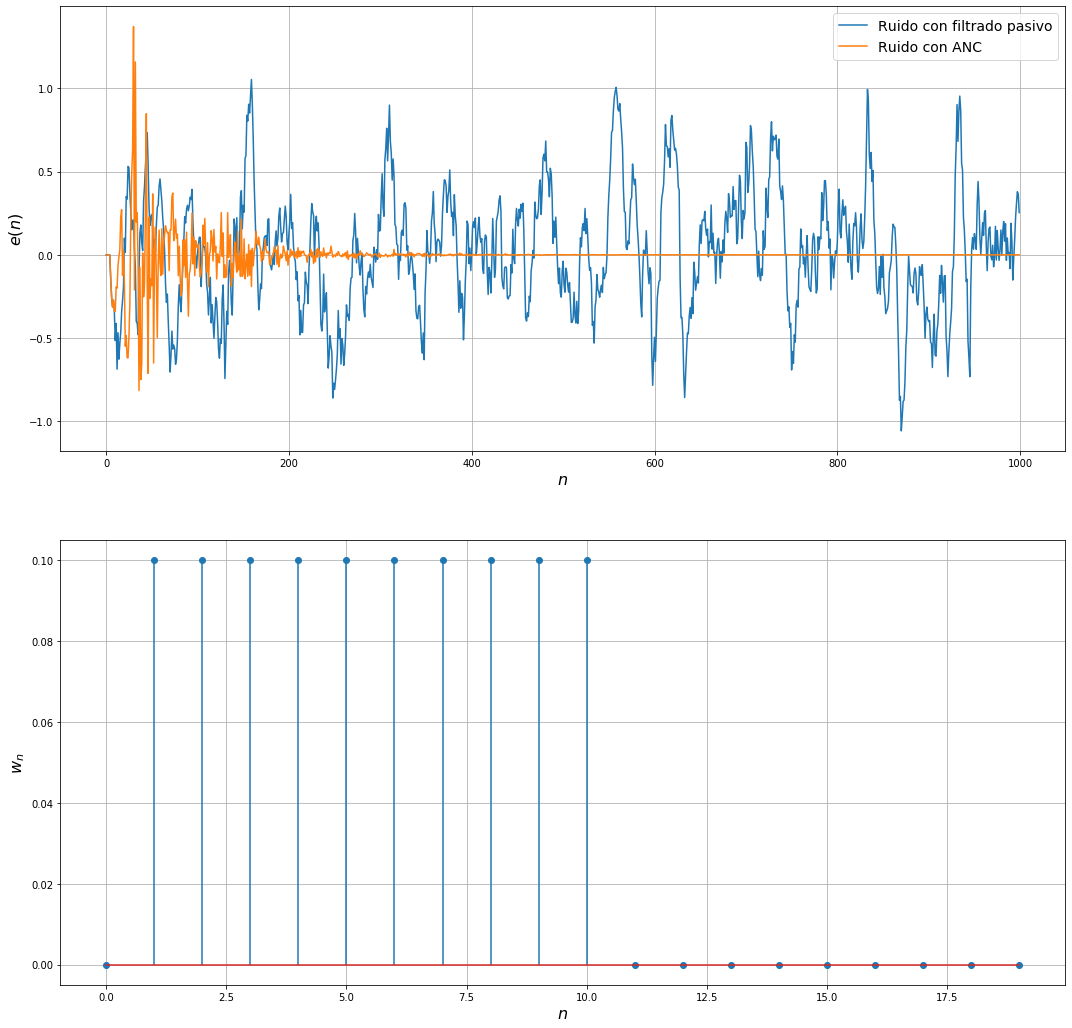

In [10]:
# Plot the ANC results
plot_helpers.plot_anc_results([headphone.d, e], w, weight_plot='response')

# Usando el Bose QC20

In [25]:
N = 1000 # Quantity of samples used for the simulation  
x = np.random.normal(size=N) # Gaussian white noise

In [26]:
headphone = boseqc20_model.BoseQC20('../support/dataset/BoseQC20.json', secondary_enable=True, feedback_enable=True) # Create testbench model
headphone.set_noise(x) # Load the noise samples for the simulation
headphone.reset() # Reset the time instant

In [27]:
forget = 0.99
order = 1000
e2, w2 = anc_complete.anc_complete(headphone, headphone.g, headphone.f, order=order, forget=forget, delta=np.var(x) * (1 - forget), force_hermitian=True)

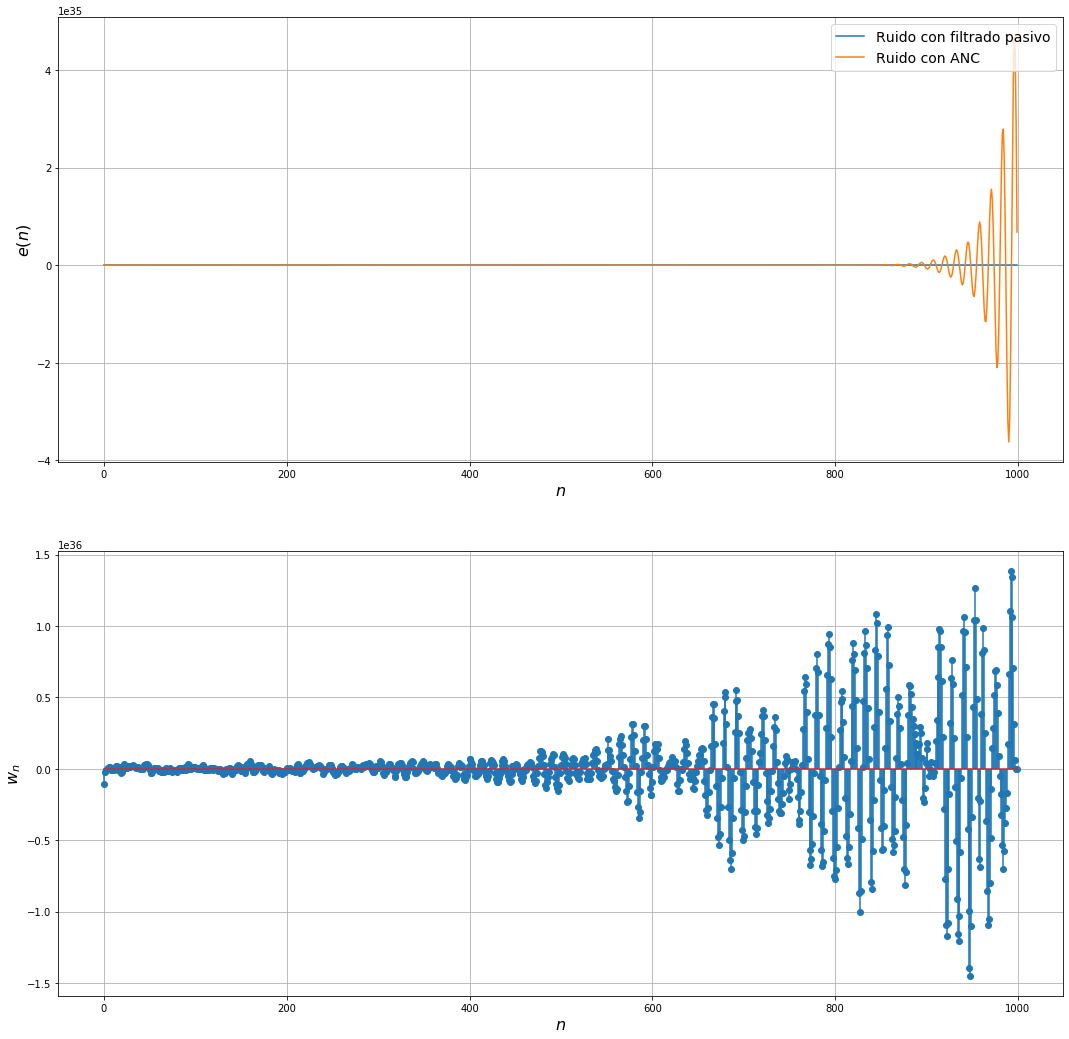

In [28]:
# Plot the ANC results
plot_helpers.plot_anc_results([headphone.d, e2], w2, weight_plot='response')